In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
batch_size=128
num_classes = 10

In [3]:
DATA_PATH='/home/rishi/Desktop/pytorch'

In [4]:
trans=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,),(0.3081,))])
train_dataset=torchvision.datasets.MNIST(root=DATA_PATH,train=True,transform=trans)
test_dataset=torchvision.datasets.MNIST(root=DATA_PATH,train=False,transform=trans)

In [5]:
import torch.nn as nn
import torch.nn.functional as F

In [6]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)
print(len(train_loader))
print(len(test_loader))

469
79


In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1=nn.Conv2d(1,16,5,padding=2)
        self.pool1=nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(16,32,5,padding=2)
        self.pool2=nn.MaxPool2d(2,2)
        self.fc1=nn.Linear(7*7*32,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
        
    def forward(self,x):
        x=self.pool1(F.relu(self.conv1(x)))
        x=self.pool2(F.relu(self.conv2(x)))
        x=x.view(x.size(0),-1)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x

In [8]:
net=Net()
print(net)

Net(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [9]:
import torch.optim as optim
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(net.parameters(),lr=0.001)

In [10]:
loss_ls=[]
acc_ls=[]
for epoch in range(5):
    for i,data in enumerate(train_loader):
        images,labels=data
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss_ls.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total = labels.size(0)
        predicted = torch.max(outputs.data, 1)[1]
        correct = (predicted == labels).sum().item()
        accuracy=correct/total*100
        acc_ls.append(accuracy)

        
        if (i+1)%100==0:
            print('[%d %d] Loss=%f Accuracy=%f'%(epoch+1,i+1,loss.item(),accuracy))

[1 100] Loss=0.357203 Accuracy=91.406250
[1 200] Loss=0.151398 Accuracy=94.531250
[1 300] Loss=0.057213 Accuracy=97.656250
[1 400] Loss=0.031816 Accuracy=99.218750
[2 100] Loss=0.041490 Accuracy=98.437500
[2 200] Loss=0.046299 Accuracy=99.218750
[2 300] Loss=0.036663 Accuracy=99.218750
[2 400] Loss=0.050328 Accuracy=98.437500
[3 100] Loss=0.056603 Accuracy=97.656250
[3 200] Loss=0.055060 Accuracy=97.656250
[3 300] Loss=0.065720 Accuracy=98.437500
[3 400] Loss=0.048457 Accuracy=99.218750
[4 100] Loss=0.036769 Accuracy=97.656250
[4 200] Loss=0.032634 Accuracy=99.218750
[4 300] Loss=0.090610 Accuracy=96.875000
[4 400] Loss=0.016334 Accuracy=99.218750
[5 100] Loss=0.015022 Accuracy=100.000000
[5 200] Loss=0.025100 Accuracy=99.218750
[5 300] Loss=0.089474 Accuracy=99.218750
[5 400] Loss=0.011465 Accuracy=99.218750


In [11]:
with torch.no_grad():
    correct=0
    total=0
    
    for images,labels in test_loader:
        outputs=net(images)

        predictions=torch.max(outputs,1)[1]
        correct+=(predictions==labels).sum().item()
        total+=labels.size(0)
accuracy=correct/total*100
print("Test Acuracy= ",accuracy)    

Test Acuracy=  98.92999999999999


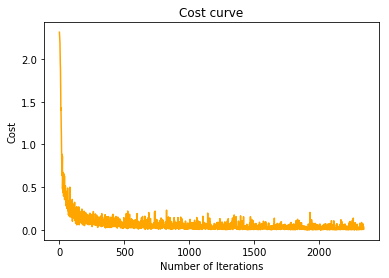

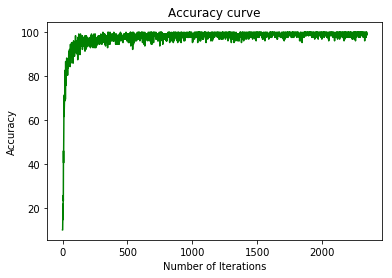

In [12]:
import matplotlib.pyplot as plt
plt.plot(loss_ls,color="orange")
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost curve')
plt.show()
plt.plot(acc_ls,color="green")
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy curve')
plt.show()

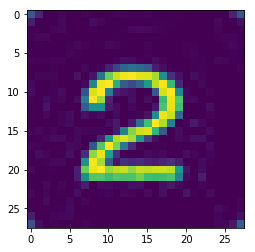

It is a  2


In [14]:
from PIL import Image
pil_image = Image.open('2(1).jpg')
pil_tensor = transforms.ToTensor()
plt.imshow(pil_image)
plt.show()
imag=pil_tensor(pil_image)
#print(imag.size())
imag=imag.unsqueeze(0)
#print(imag.size())
output=net(imag)
prediction=torch.max(output,1)[1]
print("It is a ",prediction.item())

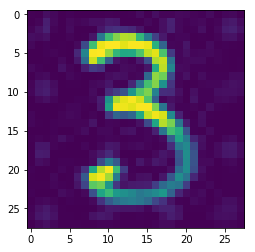

It is a  3


In [15]:
from PIL import Image
pil_image = Image.open('3.jpg')
pil_tensor = transforms.ToTensor()
pil_Greyscale=transforms.Grayscale()
imag=pil_Greyscale(pil_image)
plt.imshow(imag)
plt.show()
imag=pil_tensor(imag)
#print(imag.size())
imag=imag.unsqueeze(0)
#print(imag.size())
output=net(imag)
prediction=torch.max(output,1)[1]
print("It is a ",prediction.item())

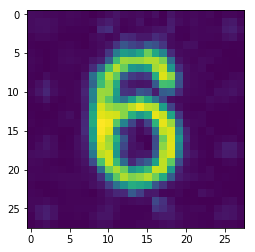

It is a  6


In [16]:
from PIL import Image
image = Image.open('6(3).jpg')
trans1=transforms.Grayscale()
trans2=transforms.ToTensor()
fig=trans1(image)
plt.imshow(fig)
plt.show()
fig=trans2(fig)
#fig=trans2(fig)
#print(fig.size())
fig=fig.unsqueeze(0)
#print(fig.size())
output=net(fig)
prediction=torch.max(output,1)[1]
print("It is a ",prediction.item())

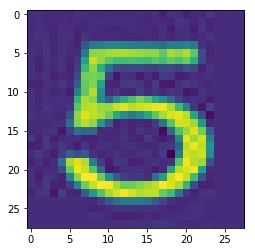

It is a  5


In [17]:
from PIL import Image
pil_image = Image.open('551.jpg')
pil_tensor = transforms.ToTensor()
pil_Greyscale=transforms.Grayscale()
imag=pil_Greyscale(pil_image)
plt.imshow(imag)
plt.show()
imag=pil_tensor(imag)
#print(imag.size())
imag=imag.unsqueeze(0)
#print(imag.size())
output=net(imag)
prediction=torch.max(output,1)[1]
print("It is a ",prediction.item())

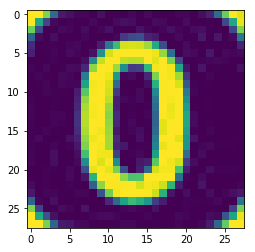

It is a  0


In [18]:
from PIL import Image
pil_image = Image.open('0(2).jpg')
pil_tensor = transforms.ToTensor()
pil_Greyscale=transforms.Grayscale()
imag=pil_Greyscale(pil_image)
plt.imshow(imag)
plt.show()
imag=pil_tensor(imag)
#print(imag.size())
imag=imag.unsqueeze(0)
#print(imag.size())
output=net(imag)
prediction=torch.max(output,1)[1]
print("It is a ",prediction.item())

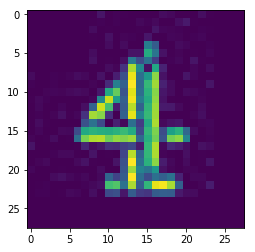

It is a  4


In [19]:
from PIL import Image
pil_image = Image.open('41.jpg')
pil_tensor = transforms.ToTensor()
pil_Greyscale=transforms.Grayscale()
imag=pil_Greyscale(pil_image)
plt.imshow(imag)
plt.show()
imag=pil_tensor(imag)
#print(imag.size())
imag=imag.unsqueeze(0)
#print(imag.size())
output=net(imag)
prediction=torch.max(output,1)[1]
print("It is a ",prediction.item())

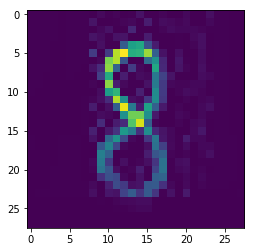

It is a  8


In [20]:
from PIL import Image
pil_image = Image.open('8(1).jpg')
pil_tensor = transforms.ToTensor()
pil_Greyscale=transforms.Grayscale()
imag=pil_Greyscale(pil_image)
plt.imshow(imag)
plt.show()
imag=pil_tensor(imag)
#print(imag.size())
imag=imag.unsqueeze(0)
#print(imag.size())
output=net(imag)
prediction=torch.max(output,1)[1]
print("It is a ",prediction.item())

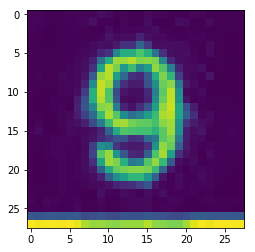

It is a  9


In [21]:
from PIL import Image
pil_image = Image.open('9111.jpg')
pil_tensor = transforms.ToTensor()
pil_Greyscale=transforms.Grayscale()
imag=pil_Greyscale(pil_image)
plt.imshow(imag)
plt.show()
imag=pil_tensor(imag)
#print(imag.size())
imag=imag.unsqueeze(0)
#print(imag.size())
output=net(imag)
prediction=torch.max(output,1)[1]
print("It is a ",prediction.item())